# **Projet Machine Learning**

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables.

## **Partie II : Modélisation** 

Nous considérons maintenant le problème de la prédiction la variable Value-co2-emissions à partir des autres variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles qui les atteignent. Voici quelques questions pour vous guider.

In [212]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

`Transformation pipeline` :

In [215]:
# Importation des données
path="/Users/hugoguilbot/VALDOM/INSA/Machine learning/Projet/global-data-on-sustainable-energy.csv"
data=pd.read_csv(path,sep=",",header=0)

data.head()

# Renommage des colonnes du DataFrame df en français (Optionnel)
data.columns = [
    'Pays',
    'Année', 
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Part des énergies renouvelables dans la consommation finale totale d\'énergie (%)',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Électricité à faible émission de carbone (% de l\'électricité)',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
    'Niveau d\'intensité énergétique de l\'énergie primaire (MJ/$2017 PPA GDP)',
    'Émissions de CO2 (kt par pays)',
    'Renouvelables (% équivalent de l\'énergie primaire)',
    'Croissance du PIB',
    'PIB par habitant',
    'Densité (P/Km2)',
    'Superficie (Km2)',
    'Latitude',
    'Longitude'
]

all_columns = data.columns.tolist()

title_Density = all_columns[17]
data[title_Density] = pd.to_numeric(data[title_Density], errors='coerce')

#Transformation valeur quantitative en catégorique
#Si FR : 
data['Année'] = data['Année'].astype(str)
#Si ENG :
#data['Year'] = data['Year'].astype(str)


# Suppression des colonnes spécifiées si dataframe en ENG
# columns_to_drop = ['Renewable-electricity-generating-capacity-per-capita', 
#                    'Financial flows to developing countries (US $)', 
#                    'Renewables (% equivalent primary energy)']
#Si en FR :
# Suppression des colonnes spécifiées
columns_to_drop = ['Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Renouvelables (% équivalent de l\'énergie primaire)']

data.drop(columns=columns_to_drop, inplace=True)

# Clean Dataset

1) Dans un premier temps, vous allez créer un jeu de données comportant seulement les observations qui n’ont pas de valeur manquante. Il reste 2768 observations.

In [216]:
# Creating a dataset with only the observations that have no missing values
data_cleaned = data.dropna()

# Checking the number of remaining observations to match the requirement
remaining_observations = len(data_cleaned)

remaining_observations

2768

Vérification de la propreté

In [217]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = data_cleaned.isnull().mean() * 100

# Affichage du pourcentage de valeurs manquantes
print(missing_values_percentage)

Pays                                                                                0.0
Année                                                                               0.0
Accès à l'électricité (% de la population)                                          0.0
Accès à des combustibles propres pour la cuisson                                    0.0
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    0.0
Électricité provenant des combustibles fossiles (TWh)                               0.0
Électricité provenant du nucléaire (TWh)                                            0.0
Électricité provenant des renouvelables (TWh)                                       0.0
Électricité à faible émission de carbone (% de l'électricité)                       0.0
Consommation d'énergie primaire par habitant (kWh/personne)                         0.0
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)             0.0
Émissions de CO2 (kt par pays)  

# Division en Train et en Test

2) Divisez ce jeu de données en un échantillon d’apprentissage et un échantillon test. Vous prendrez un
pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire lorsque nous nous
concentrons sur les performances des algorithmes ?

Mais avant de séparer le dataset en deux, il faut transformer les variables categorielles en quantitatives grace à l'encodage one hot vector 

##### **Etape 1** : Encodage (One Hot Encoder)

In [218]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# instantiate the one hot encoder
encoder = OneHotEncoder(sparse=False, drop = "first")
#ou encoder = OneHotEncoder(sparse=False)

# Sélection des colonnes catégorielles
categorical_vars = ["Pays", "Année"]

# Application de l'encodage One-Hot sur les variables catégorielles
encoded_vars = encoder.fit_transform(data_cleaned[categorical_vars])

# Création d'un DataFrame pour les variables encodées
encoded_vars_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(categorical_vars))

# concatenate the new dataframe back to the original input variables dataframe
df_cleaned_new = pd.concat([data_cleaned.reset_index(drop=True), encoded_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_cleaned_new.drop(categorical_vars, axis = 1, inplace = True)


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [219]:
df_cleaned_new.dtypes

Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
                                                                                     ...   
Année_2015                                                                          float64
Année_2016                                                                          float64
Année_2017                                                                          float64
Année_2018                                                                          float64
Année_2019                                                                      

##### **Etape 2** : Division échantillon `train` et `test`

In [255]:
# Diviser les données en ensembles d'apprentissage et de test
train, test = train_test_split(df_cleaned_new, test_size=0.2, random_state=42)

# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Émissions de CO2 (kt par pays)", axis=1)
y_train = train["Émissions de CO2 (kt par pays)"]

X_test = test.drop("Émissions de CO2 (kt par pays)", axis=1)
y_test = test["Émissions de CO2 (kt par pays)"]

# Nous travaillons avec le log ytrain
log_y_train = np.log(y_train)
log_y_test = np.log(y_train)

##### **Etape 3** : Stardardisation

"L'étape suivante est une étape de standardisation des données ou normalisation. Les variables sont divisées par leur écart-type. Ce n'est pas utile dans le cas d'un modèle linéaire élémentaire car la solution est identique mais indispensbale pour beaucoup d'autres méthodes non linéaires (SVM, réseaux de neurones, modèles avec pénalisation). Cette étape est donc concrètement systématiquement exécutée pour éviter des soucis."

In [256]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

# Modèle de régression linéaire

Comment comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables avec/sans pénalisation ?

Dans un premier temps il faut faire une régression linéaire élémentaire pour avoir une solution de base.
Ensuite, nous pouvons créé une regression avec sélection de variable en focntion de la p-value

Nous pouvons tester la régression pénalisé, comme lasso, ridge, elastic-net.
A cela nous pouvons faire une sélection de variable.

Pour les regression pénalisé faire avec la standardisation

Etape 1 : Régression simple sans sélection de variables ni pénalisation
Etape 2 : Régression simple avec sélection de variable sans pénalisation
Etape 3 : Régression avec pénalisation lasso, ridge, elastic-net
Etape 4 : Régression pénalisée avec sélection de variable

##### **Etape 1** : Régression simple sans sélection de variables ni pénalisation

In [277]:
import statsmodels.api as sm

# Fit du modèle linéaire
lr_model_1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model_1.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-40687.367883,17001.040007,-2.393228,0.016791,-74028.565969,-7346.169796
Accès à l'électricité (% de la population),-27.428811,156.950985,-0.174760,0.861285,-335.229620,280.371998
Accès à des combustibles propres pour la cuisson,-16.075228,224.505151,-0.071603,0.942925,-456.358335,424.207879
Part des énergies renouvelables dans la consommation finale totale d'énergie (%),-202.243341,224.175043,-0.902167,0.367075,-641.879064,237.392382
Électricité provenant des combustibles fossiles (TWh),2215.107083,15.626860,141.749981,0.000000,2184.460827,2245.753340
...,...,...,...,...,...,...
Année_2015,2566.338074,5837.578428,0.439624,0.660256,-8881.894426,14014.570573
Année_2016,2081.708621,6015.625978,0.346050,0.729341,-9715.697730,13879.114971
Année_2017,1371.573143,5945.193734,0.230703,0.817569,-10287.706634,13030.852920
Année_2018,-860.841622,6128.039981,-0.140476,0.888298,-12878.706107,11157.022863


In [278]:
lr_model_1.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.998
1,Dependent Variable:,Émissions de CO2 (kt par pays),AIC:,53144.6514
2,Date:,2024-02-17 17:08,BIC:,54131.1936
3,No. Observations:,2214,Log-Likelihood:,-26399.
4,Df Model:,172,F-statistic:,6572.
5,Df Residuals:,2041,Prob (F-statistic):,0.00
6,R-squared:,0.998,Scale:,1.4446e+09


In [279]:
# Obtention des prédictions et des métriques d'évaluation
lr1_y_train_pred = lr_model_1.predict(sm.add_constant(X_train))
lr1_y_test_pred = lr_model_1.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, lr1_y_train_pred)
r2_test = r2_score(y_test, lr1_y_test_pred)
mse_train = mean_squared_error(y_train, lr1_y_train_pred)
mse_test = mean_squared_error(y_test, lr1_y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  9.981978e-01  9.967537e-01
1      MSE  1.331740e+09  1.638670e+09
2     RMSE  3.649301e+04  4.048049e+04


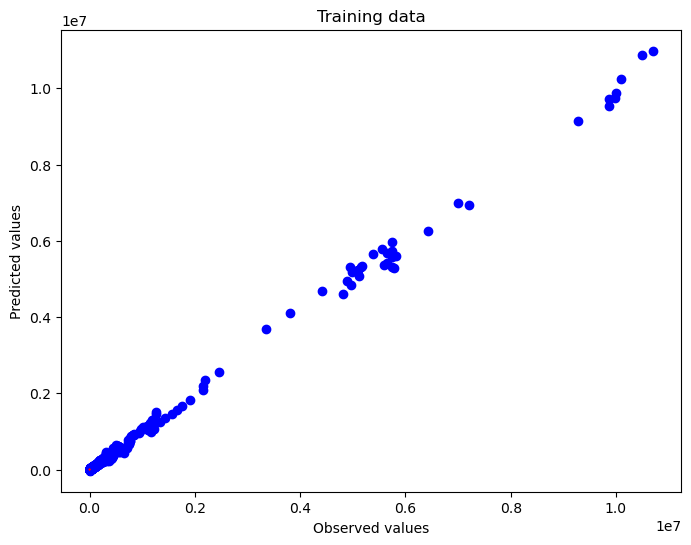

In [267]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, lr1_y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()


##### **Etape 2** : Régression simple avec sélection de variable sans pénalisation

1) Vérification des hypothèses du modèles qui mèneront à une sélection de variable pour ce modèle linéaire

**Vérification de la multicolinéarité**

In [268]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


     VIF Factor                                           features
0     37.818745         Accès à l'électricité (% de la population)
1    118.267101   Accès à des combustibles propres pour la cuisson
2     68.496085  Part des énergies renouvelables dans la consom...
3     59.469252  Électricité provenant des combustibles fossile...
4     58.915219           Électricité provenant du nucléaire (TWh)
..          ...                                                ...
171    2.529521                                         Année_2015
172    2.528171                                         Année_2016
173    2.733214                                         Année_2017
174    2.810837                                         Année_2018
175    2.958438                                         Année_2019

[176 rows x 2 columns]


### Vérification de la corrélation de pearson

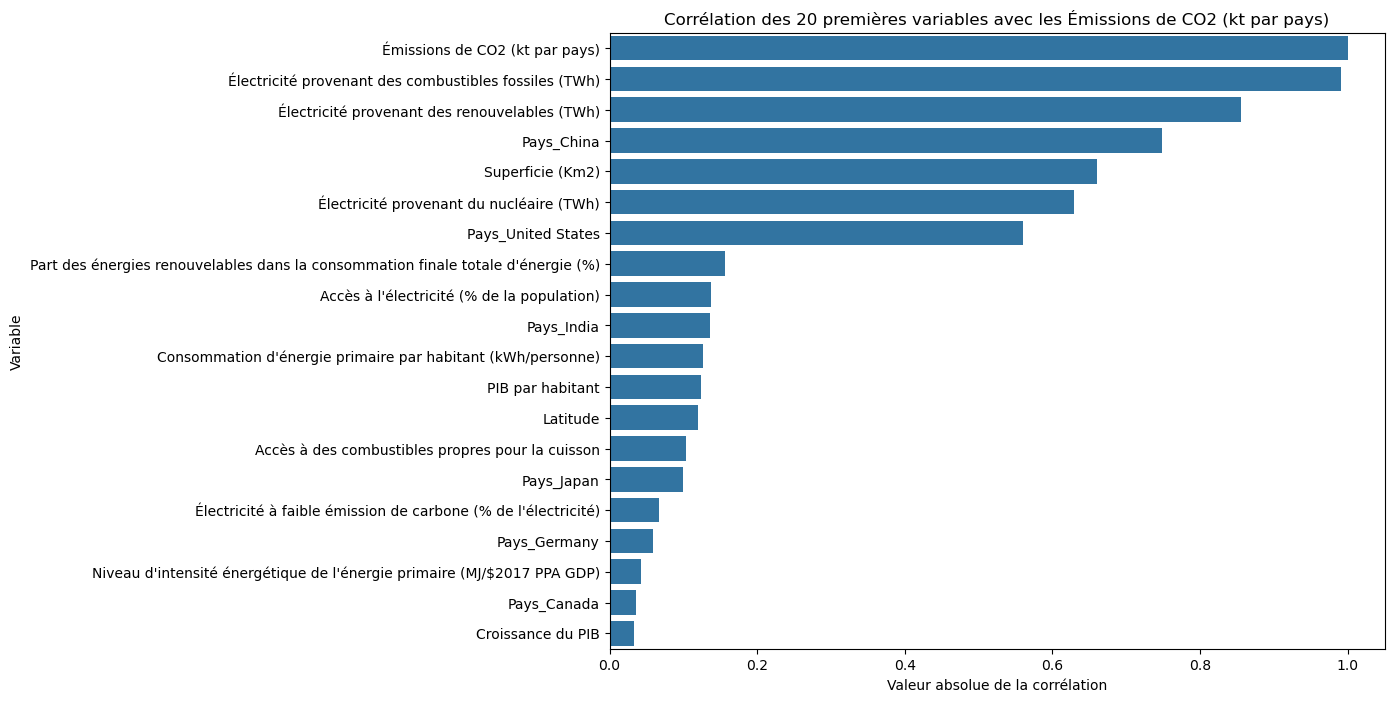

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating 'train' DataFrame correlation computation and sorting
# This is a placeholder - replace 'train' with your actual DataFrame variable
correlations = abs(train.corr()["Émissions de CO2 (kt par pays)"]).sort_values(ascending=False)

# Selecting only the top 20 correlations
top_20_correlations = correlations.head(20)

# Plotting the top 20 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_correlations.values, y=top_20_correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation des 20 premières variables avec les Émissions de CO2 (kt par pays)")
plt.show()



Les plus corrélé c'esr electricité combustible fossile,
elec renouvelable, chine; superficie, nucléaire, USA, part des energies ...

### Sélection de Variables Basée sur les Statistiques

In [270]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features

selected_features = forward_selection(X_train, y_train)
print(selected_features)


['Électricité provenant des combustibles fossiles (TWh)', 'Pays_China', 'Superficie (Km2)', 'Pays_France', 'Pays_Australia', 'Pays_Japan', 'Pays_Ukraine', 'Pays_Germany', "Accès à l'électricité (% de la population)", 'Électricité provenant des renouvelables (TWh)', 'Pays_United States', 'Électricité provenant du nucléaire (TWh)', 'Pays_Brazil', 'Pays_Canada', 'Pays_Norway', "Électricité à faible émission de carbone (% de l'électricité)", 'Pays_United Kingdom', 'Pays_South Africa', 'Pays_Nigeria', 'Pays_Austria', 'Pays_Israel', 'Pays_Colombia', 'Pays_Thailand', 'Pays_Paraguay', 'Pays_Netherlands', 'Pays_India', 'Pays_Sweden', 'Pays_Switzerland', 'Pays_Kuwait', 'Pays_United Arab Emirates', 'Pays_New Zealand', 'Pays_Uzbekistan', 'Pays_Turkmenistan', 'Pays_Pakistan', 'Pays_Ecuador', 'Pays_Romania', 'Pays_Mexico', 'Pays_Peru']


sélection des variables

In [321]:
train_selectedb = train[selected_features]
test_selectedb = test[selected_features]

train_selectedb["Émissions de CO2 (kt par pays)"] = train["Émissions de CO2 (kt par pays)"]
test_selectedb["Émissions de CO2 (kt par pays)"] = test["Émissions de CO2 (kt par pays)"]

train_selectedb


/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_7222/1284565193.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_7222/1284565193.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Électricité provenant des combustibles fossiles (TWh),Pays_China,Superficie (Km2),Pays_France,Pays_Australia,Pays_Japan,Pays_Ukraine,Pays_Germany,Accès à l'électricité (% de la population),Électricité provenant des renouvelables (TWh),...,Pays_United Arab Emirates,Pays_New Zealand,Pays_Uzbekistan,Pays_Turkmenistan,Pays_Pakistan,Pays_Ecuador,Pays_Romania,Pays_Mexico,Pays_Peru,Émissions de CO2 (kt par pays)
2124,0.36,0.0,26338.0,0.0,0.0,0.0,0.0,0.0,29.370000,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.160000e+03
2716,0.05,0.0,12189.0,0.0,0.0,0.0,0.0,0.0,36.470303,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+02
2232,0.05,0.0,71740.0,0.0,0.0,0.0,0.0,0.0,13.500000,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.040000e+03
261,0.08,0.0,112622.0,0.0,0.0,0.0,0.0,0.0,25.279833,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.650000e+03
2059,25.34,0.0,92212.0,0.0,0.0,0.0,0.0,0.0,100.000000,28.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.094000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.50,0.0,13812.0,0.0,0.0,0.0,0.0,0.0,100.000000,1.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.600000e+03
1095,0.27,0.0,27750.0,0.0,0.0,0.0,0.0,0.0,33.152473,0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.830000e+03
1130,4.19,0.0,112090.0,0.0,0.0,0.0,0.0,0.0,86.500000,5.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.260000e+03
1294,564.95,0.0,377944.0,0.0,0.0,1.0,0.0,0.0,100.000000,101.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170380e+06


In [322]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
Xs_train = train_selectedb.drop("Émissions de CO2 (kt par pays)", axis=1)
ys_train = train_selectedb["Émissions de CO2 (kt par pays)"]

Xs_test = test_selectedb.drop("Émissions de CO2 (kt par pays)", axis=1)
ys_test = test_selectedb["Émissions de CO2 (kt par pays)"]

# Fit du modèle linéaire
lr_modelb_2 = sm.OLS(ys_train, sm.add_constant(Xs_train)).fit()

# Obtention du tableau de résultats
results_table = lr_modelb_2.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-6.963890e+03,2814.746102,-2.474074,1.343400e-02,-1.248376e+04,-1.444017e+03
Électricité provenant des combustibles fossiles (TWh),2.210409e+03,14.392140,153.584484,0.000000e+00,2.182186e+03,2.238633e+03
Pays_China,1.368382e+06,30773.669122,44.465990,1.001440e-307,1.308033e+06,1.428731e+06
Superficie (Km2),6.889156e-03,0.001908,3.610014,3.131045e-04,3.146784e-03,1.063153e-02
Pays_France,-6.290376e+04,27237.034528,-2.309494,2.100945e-02,-1.163171e+05,-9.490434e+03
Pays_Australia,-9.946764e+04,17110.677359,-5.813191,7.032997e-09,-1.330226e+05,-6.591266e+04
Pays_Japan,-4.263284e+05,14868.181808,-28.673876,1.184393e-153,-4.554857e+05,-3.971711e+05
Pays_Ukraine,1.697193e+04,10718.768789,1.583384,1.134793e-01,-4.048167e+03,3.799203e+04
Pays_Germany,-2.538120e+04,11669.811252,-2.174945,2.974163e-02,-4.826635e+04,-2.496055e+03
Accès à l'électricité (% de la population),4.802509e+01,28.644087,1.676614,9.376162e-02,-8.147549e+00,1.041977e+02


In [275]:
lr_modelb_2.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.998
1,Dependent Variable:,Émissions de CO2 (kt par pays),AIC:,52940.8673
2,Date:,2024-02-17 17:08,BIC:,53163.2670
3,No. Observations:,2214,Log-Likelihood:,-26431.
4,Df Model:,38,F-statistic:,3.079e+04
5,Df Residuals:,2175,Prob (F-statistic):,0.00
6,R-squared:,0.998,Scale:,1.3955e+09


### Vérification de la normalité

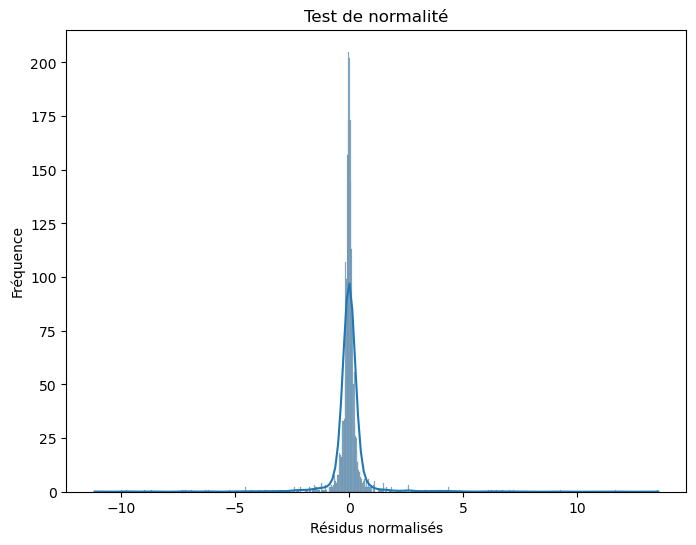

In [276]:
# Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()


##### **Etape 3** : Régression avec pénalisation lasso, ridge, elastic-net

## Régression Ridge

La régression Ridge est une technique de régression linéaire régularisée qui utilise une pénalité de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la régression dans des problèmes de haute dimensionnalité.

### Avantages de la régression Ridge

- La régression Ridge peut aider à réduire la variance et à améliorer la stabilité des modèles, en limitant la croissance des coefficients des variables.
- La régression Ridge est moins sensible aux valeurs aberrantes et aux données manquantes que la régression Lasso.

### Inconvénients de la régression Ridge

- La régression Ridge ne peut pas sélectionner de variables, elle peut donc inclure des variables non pertinentes dans le modèle.
- La régression Ridge peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Ridge

La fonction de coût de la régression Ridge est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_2^2` est la norme L2 des coefficients.

La régularisation L2 introduit une pénalité qui force tous les coefficients à rester petits, ce qui peut réduire la variance du modèle.

In [290]:
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

# Créer et ajuster le modèle RidgeCV
alphas = np.linspace(0.01, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv=7) # cv est le nombre de plis (folds) pour la validation croisée
ridge_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.45794e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.68025e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.78251e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.15211e-19): result may not be accurat

Best alpha: 0.01


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.23213e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.16654e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.21531e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.28573e-17): result may not be accurat

In [292]:
prev=ridge_cv.predict(X_test)
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

MSE= 1644771199.8667428
R2= 0.9967415747268357


In [301]:
# Erreur quadratique moyenne
from sklearn.metrics import r2_score
print("R2=",r2_score(y_test,X_test["Accès à des combustibles propres pour la cuisson"]))

R2= -0.0413508148368229


In [297]:
import plotly.express as px
fig=px.scatter(x=X_test["Accès à des combustibles propres pour la cuisson"],y=y_test,labels={'x': 'Accès à des combustibles propres pour la cuisson' , 'y': 'CO2 observé'})
fig.show()

In [298]:
fig=px.scatter(x=X_test["Accès à des combustibles propres pour la cuisson"],y=X_test["Accès à des combustibles propres pour la cuisson"]-y_test,labels={'x': 'Accès à des combustibles propres pour la cuisson"' , 'y': 'Residus'})
fig.show()

In [294]:
import plotly.express as px

fig=px.scatter(x=prev,y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})
fig.show()

In [295]:
fig=px.scatter(x=prev,y=y_test-prev,labels={'x': 'Prédite' , 'y': 'Résidus'})
fig.show()

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.68391e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.29559e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.87015e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.06936e-19): result may not be accurat

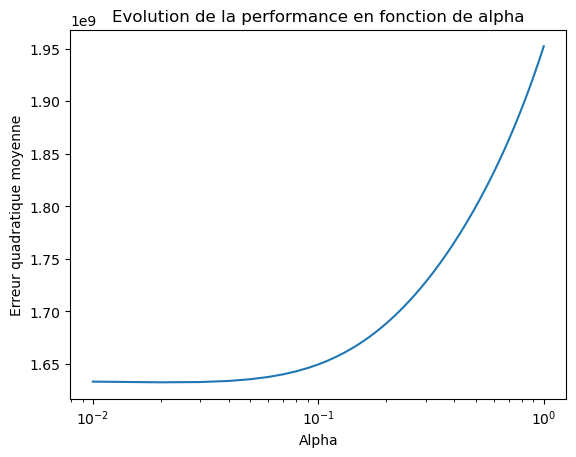

In [291]:
mse_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

## Régression LASSO

La régression Lasso est une technique de régression linéaire régularisée qui utilise une pénalité de L1 pour réduire les coefficients des variables non pertinentes à zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Lasso

- La régression Lasso peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.
- La régression Lasso peut aider à réduire la dimensionnalité des données, en éliminant les variables qui ont peu d'impact sur la prédiction.

### Inconvénients de la régression Lasso

- La régression Lasso peut être sensible aux valeurs aberrantes (outliers) et aux données manquantes, ce qui peut entraîner des coefficients mal estimés.
- La régression Lasso peut ne pas fonctionner correctement si les variables sont fortement corrélées, car elle peut avoir des difficultés à sélectionner les variables les plus importantes.

### Fonction de coût de la régression Lasso

La fonction de coût de la régression Lasso est définie comme :
    $$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_1 \right) $$
    où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_1` est la norme L1 des coefficients.

La régularisation L1 introduit une pénalité qui force certains coefficients à devenir exactement égaux à zéro, ce qui peut conduire à un modèle parcimonieux et plus interprétable.

In [299]:
from sklearn.linear_model import LassoCV

# Créer et ajuster le modèle LassoCV
alphas = [0.001, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392657308614.116, tolerance: 143916900044.13727

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1299366907492.4277, tolerance: 143916900044.13727

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287529959548.7458, tolerance: 143916900044.13727

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent

Best alpha: 10.0


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+12, tolerance: 1.636e+11



/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+12, tolerance: 1.439e+11

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+12, tolerance: 1.299e+11

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

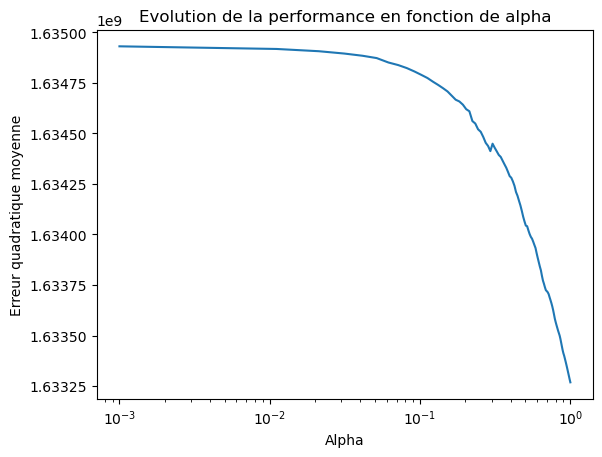

In [303]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.linspace(0.001, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
mse_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

In [302]:
prev=lasso_cv.predict(X_test)
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

MSE= 1670038333.4665465
R2= 0.9966915184839317


## Régression Elastic Net

La régression Elastic Net est une technique de régression linéaire régularisée qui utilise une combinaison des pénalités de L1 et de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Elastic Net

- La régression Elastic Net peut aider à réduire la variance et à améliorer la stabilité des modèles, en combinant les avantages de la régression Lasso et de la régression Ridge.
- La régression Elastic Net peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.

### Inconvénients de la régression Elastic Net

- La régression Elastic Net peut être plus complexe à mettre en œuvre que la régression Lasso ou Ridge, car elle nécessite de déterminer deux paramètres de régularisation.
- La régression Elastic Net peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Elastic Net

La fonction de coût de la régression Elastic Net est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation, `rho` est le paramètre d'élasticité et `||w||_1` et `||w||_2^2` sont les normes L1 et L2 des coefficients.

La régularisation Elastic Net introduit une pénalité qui force à la fois la sparsité des coefficients et leur magnitude globale, ce qui peut conduire à des modèles plus parcimonieux et plus stables.


In [306]:
# Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster le modèle aux données
elasticNet.fit(X_train, y_train)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = elasticNet.alpha_
best_l1_ratio = elasticNet.l1_ratio_

# Imprimer le meilleur alpha et le meilleur l1_ratio
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1518532218927.4036, tolerance: 143916900044.13727

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314390859353.897, tolerance: 143916900044.13727

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1370039880277.2078, tolerance: 129913950706.53471

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent

Meilleur alpha: 10.0
Meilleur l1_ratio: 1.0


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+12, tolerance: 1.636e+11



/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+12, tolerance: 1.439e+11

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+12, tolerance: 1.299e+11

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

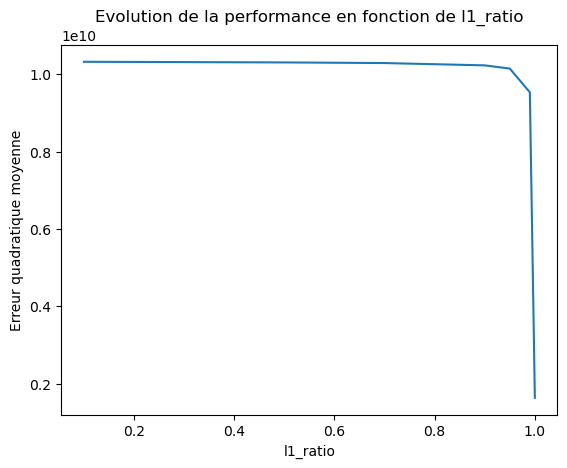

In [308]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.logspace(-5, 5, 11)
mse_scores = {}
for l1_ratio in [.1, .5, .7, .9, .95, .99, 1]:
    model = ElasticNet(alpha=best_alpha, l1_ratio=l1_ratio)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores[l1_ratio] = mse_score

plt.plot(list(mse_scores.keys()), list(mse_scores.values()))
plt.xlabel('l1_ratio')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de l1_ratio')
plt.show()

In [307]:
prev=elasticNet.predict(X_test)
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

MSE= 1670038333.4665465
R2= 0.9966915184839317


# Resumé

In [327]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

# Prédire les valeurs pour les données d'apprentissage et de test
lr1_y_train_pred = lr_model_1.predict(sm.add_constant(X_train))
lr1_y_test_pred = lr_model_1.predict(sm.add_constant(X_test))

lr2_y_train_pred = lr_modelb_2.predict(sm.add_constant(Xs_train))
lr2_y_test_pred = lr_modelb_2.predict(sm.add_constant(Xs_test))

ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

enet_train_pred = enet_model.predict(X_train)
enet_test_pred = enet_model.predict(X_test)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
#model 1 sans selection et sans pénalisation
lr1_r2_train = r2_score(y_train, lr1_y_train_pred)
lr1_r2_test = r2_score(y_test, lr1_y_test_pred)
lr1_mse_train = mean_squared_error(y_train, lr1_y_train_pred)
lr1_mse_test = mean_squared_error(y_test, lr1_y_test_pred)
lr1_rmse_train = np.sqrt(lr1_mse_train)
lr1_rmse_test = np.sqrt(lr1_mse_test)
#model 2 avec sélection ef sans pénalisation
lr2_r2_train = r2_score(ys_train, lr2_y_train_pred)
lr2_r2_test = r2_score(ys_test, lr2_y_test_pred)
lr2_mse_train = mean_squared_error(ys_train, lr2_y_train_pred)
lr2_mse_test = mean_squared_error(ys_test, lr2_y_test_pred)
lr2_rmse_train = np.sqrt(lr2_mse_train)
lr2_rmse_test = np.sqrt(lr2_mse_test)

ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
enet_train_r2 = r2_score(y_train, enet_train_pred)
enet_test_r2 = r2_score(y_test, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test, enet_test_pred))

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.99201e-22): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.63055e-22): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.16233e-22): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.42047e-22): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=6.63736e-22): result ma

In [328]:
data = {'Modèle': ['Régression linéaire sans sélection de variables','Régression linéaire avec sélection de variables','Ridge', 'Lasso', 'ElasticNet'],
'R2 sur base train': [lr1_r2_train,lr2_r2_train,ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [lr1_r2_test,lr2_r2_test,ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [lr1_rmse_train,lr2_rmse_train,ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [lr1_rmse_test,lr2_rmse_test,ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Régression linéaire sans sélection de variables,0.998198,0.996754,36493.014876,40480.490537
1,Régression linéaire avec sélection de variables,0.998145,0.996731,37026.101240,40619.720013
2,Ridge,0.998197,0.996742,36495.959213,40555.778871
3,Lasso,0.998184,0.996692,36636.997103,40866.102499
4,ElasticNet,0.998184,0.996692,36636.997103,40866.102499
